## Exploratory Data Analysis

# Importasi Library

In [1]:
#Import library untuk data preparation dan visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import statistics

from scipy.stats import ttest_ind                     # import scipy stats untuk uji statistik
from scipy.stats import t    
import src.util as util
import scipy.stats as scs
import yaml

# Import Data

Import data dengan format pickle dan akan diload menjadi dataframe sesuai dengan format save sebelumnya

In [2]:
config_data = util.load_config()

In [3]:
params_dir = "config/config.yaml"

In [4]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [5]:
params = load_params(params_dir)

In [6]:
params

{'raw_dataset_dir': 'dataset/1 - raw data/',
 'train_set_path': ['dataset/2 - processed/X_train.pkl',
  'dataset/2 - processed/y_train.pkl'],
 'valid_set_path': ['dataset/2 - processed/X_valid.pkl',
  'dataset/2 - processed/y_valid.pkl'],
 'test_set_path': ['dataset/2 - processed/X_test.pkl',
  'dataset/2 - processed/y_test.pkl'],
 'robust_scaler_train': ['dataset/3 - final/X_train_robust.pkl',
  'dataset/3 - final/y_train.pkl'],
 'robust_scaler_valid': ['dataset/3 - final/X_valid_robust.pkl',
  'dataset/3 - final/y_valid.pkl'],
 'robust_scaler_test': ['dataset/3 - final/X_test_robust.pkl',
  'dataset/3 - final/y_test.pkl'],
 'production_model_path': 'model/5 - Model Final',
 'model_robust_scaler': 'model/5 - Model Final/robust_scaler.pkl',
 'robust_scaler': 'model/5 - Model Final/',
 'model_final': 'model/5 - Model Final/xgboost_cv_robust.pkl',
 'print_debug': True,
 'int64_columns': ['Year', 'Kms_Driven', 'Owner'],
 'float64_columns': ['Present_Price'],
 'object_columns': ['Fuel_Type

In [7]:
"""
# Memuat DataFrame dari file pickle
X_train = pickle.load(open(config_data["train_set_path"][0], "rb"))
y_train = pickle.load(open(config_data["train_set_path"][1], "rb"))
"""
"""
#Import data yang sudah dibuat sebelumnya dari proses data preparation
X_train = joblib.load("C:\\Users\\hp\\Portofolio Data Science\\4 - Vehicle Price Prediction\\dataset\\2 - processed\\X_train.pkl")
y_train = joblib.load("C:\\Users\\hp\\Portofolio Data Science\\4 - Vehicle Price Prediction\\dataset\\2 - processed\\y_train.pkl")
"""

'\n#Import data yang sudah dibuat sebelumnya dari proses data preparation\nX_train = joblib.load("C:\\Users\\hp\\Portofolio Data Science\\4 - Vehicle Price Prediction\\dataset\\2 - processed\\X_train.pkl")\ny_train = joblib.load("C:\\Users\\hp\\Portofolio Data Science\\4 - Vehicle Price Prediction\\dataset\\2 - processed\\y_train.pkl")\n'

In [8]:
#Import data yang sudah dibuat sebelumnya dari proses data preparation
X_train = util.pickle_load(config_data["train_set_path"][0])
y_train = util.pickle_load(config_data["train_set_path"][1])

In [9]:
#Sanity Check Data
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
5,2018,9.83,2071,Diesel,Dealer,Manual,0
258,2015,13.60,25000,Petrol,Dealer,Manual,0
278,2016,8.40,4000,Petrol,Dealer,Manual,0
260,2016,13.60,29223,Petrol,Dealer,Manual,0
7,2015,8.61,33429,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...
106,2014,3.45,16500,Petrol,Individual,Manual,1
83,2015,13.46,38000,Diesel,Dealer,Manual,0
17,2016,10.79,43000,Diesel,Dealer,Manual,0
230,2013,9.40,45000,Diesel,Dealer,Manual,0


In [10]:
#Sanity Check Data
y_train

5       9.25
258     8.40
278     6.00
260     9.15
7       6.50
       ...  
106     1.35
83     12.50
17      7.75
230     6.15
98      7.05
Name: Selling_Price, Length: 225, dtype: float64

## Menggabungkan Data untuk dijadikan Set EDA

In [11]:
#Menggabungkan x train dan y train untuk keperluan EDA
train_set = pd.merge(X_train, y_train, left_index=True, right_index=True)
#Sanity Check Data
train_set

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
5,2018,9.83,2071,Diesel,Dealer,Manual,0,9.25
258,2015,13.60,25000,Petrol,Dealer,Manual,0,8.40
278,2016,8.40,4000,Petrol,Dealer,Manual,0,6.00
260,2016,13.60,29223,Petrol,Dealer,Manual,0,9.15
7,2015,8.61,33429,Diesel,Dealer,Manual,0,6.50
...,...,...,...,...,...,...,...,...
106,2014,3.45,16500,Petrol,Individual,Manual,1,1.35
83,2015,13.46,38000,Diesel,Dealer,Manual,0,12.50
17,2016,10.79,43000,Diesel,Dealer,Manual,0,7.75
230,2013,9.40,45000,Diesel,Dealer,Manual,0,6.15


In [12]:
# Melihat informasi statistika deskriptif
train_set.describe()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,225.000000,225.000000,225.000000,225.000000,225.000000
mean,2013.595556,7.828533,36611.888889,0.048889,4.762533
std,2.982236,9.328343,41382.114700,0.271094,5.325134
min,2003.000000,0.470000,500.000000,0.000000,0.100000
25%,2012.000000,1.200000,14500.000000,0.000000,0.900000
50%,2014.000000,6.050000,30000.000000,0.000000,3.500000
75%,2016.000000,9.900000,47000.000000,0.000000,6.150000
max,2018.000000,92.600000,500000.000000,3.000000,35.000000


## Cek Missing Value

In [13]:
train_set.isnull().sum()

Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

## Cek Informasi Statistic

In [14]:
# cek skewness
train_set.skew(numeric_only = True)

Year            -1.271472
Present_Price    4.185378
Kms_Driven       6.782914
Owner            7.361111
Selling_Price    2.540769
dtype: float64

Rules : 
* jika kolom mendapati skewnya sebesar > +- 0.5, maka dari itu kolom tersebut akan diimputasi dengan median
* jika kolom mendapati skewnya sebesar <= +- 0.5 kolom lainnya akan diimputasi dengan mean atau modus

Imputasi Median :
* Kms_Driven
* Present_Price
* Owner

Imputasi Modus :
* Year                    

## Melihat Distribusi Data

### Plot distribusi

C:\Users\hp\AppData\Local\Temp\ipykernel_7932\3994369030.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_set[col], shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7932\3994369030.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_set[col], shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7932\3994369030.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_set[col], shade=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7932\3994369030.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; pleas

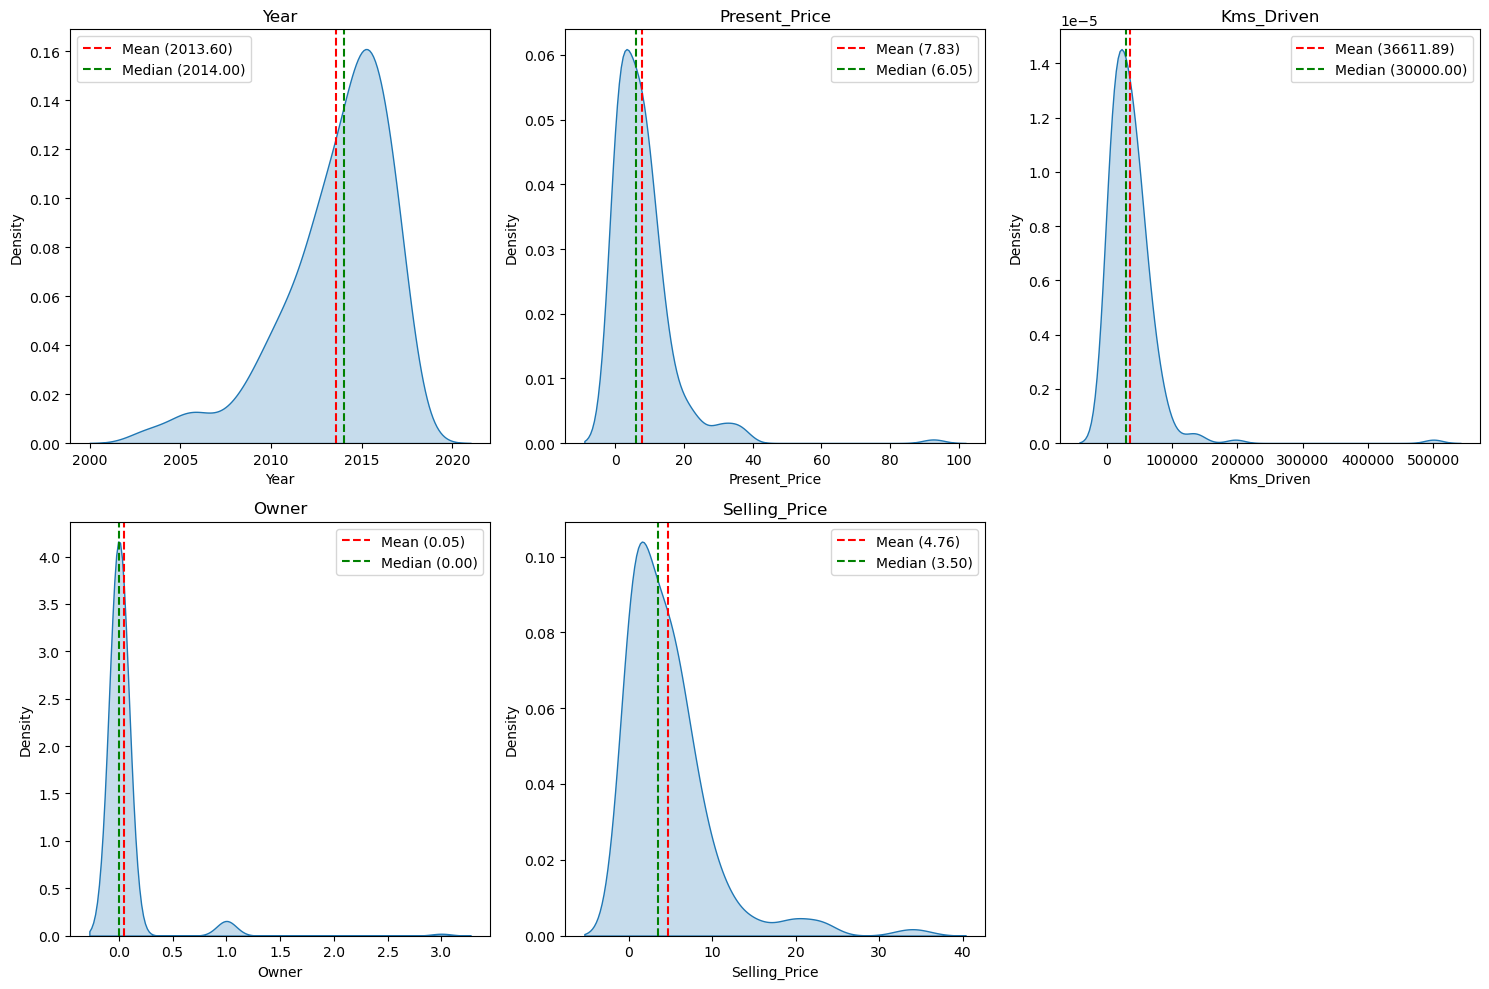

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur jumlah baris dan kolom untuk subplot
num_rows = 2
num_cols = 3

# Menghitung jumlah total subplot
total_subplots = num_rows * num_cols

# Menyesuaikan ukuran gambar (figsize)
plt.figure(figsize=(15, 10))

# Menyiapkan indeks untuk subplot
subplot_index = 1

# Menggunakan looping untuk melakukan visualisasi distribusi data setiap kolom
for col in train_set.columns:
    if train_set[col].dtype != 'object':
        # Membuat subplot
        plt.subplot(num_rows, num_cols, subplot_index)
        
        # Menggunakan kdeplot
        ax = sns.kdeplot(train_set[col], shade=True)
        mean_val = train_set[col].mean()
        median_val = train_set[col].median()
        ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
        ax.axvline(median_val, color='green', linestyle='--', label=f'Median ({median_val:.2f})')
        ax.set_title(col)
        plt.legend()
        
        # Menambahkan indeks subplot
        subplot_index += 1

# Mengatur tata letak subplot
plt.tight_layout()
plt.savefig('EDA_2_Distribusi_Data.png')
# Menampilkan subplot
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_20252\2075184046.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_set[col], shade=True)


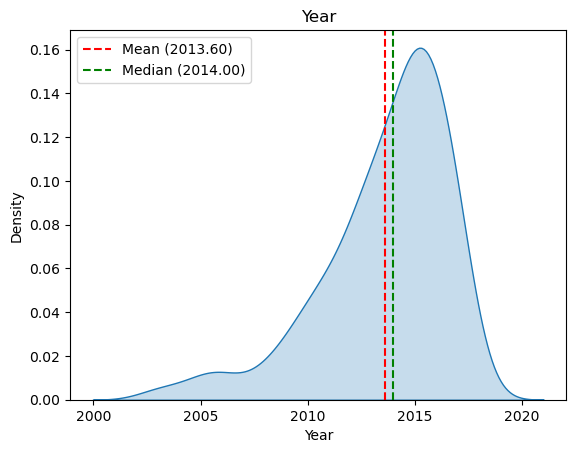

C:\Users\hp\AppData\Local\Temp\ipykernel_20252\2075184046.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_set[col], shade=True)


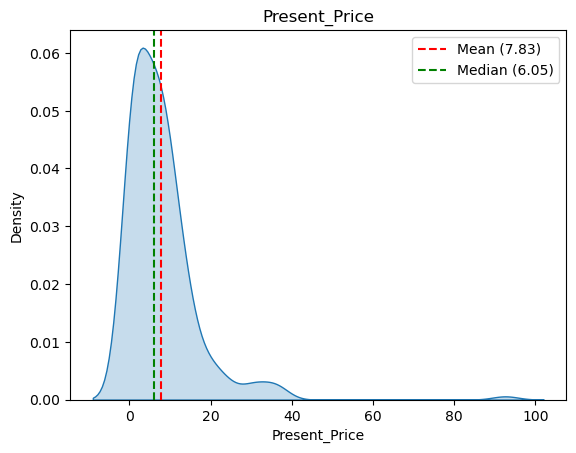

C:\Users\hp\AppData\Local\Temp\ipykernel_20252\2075184046.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_set[col], shade=True)


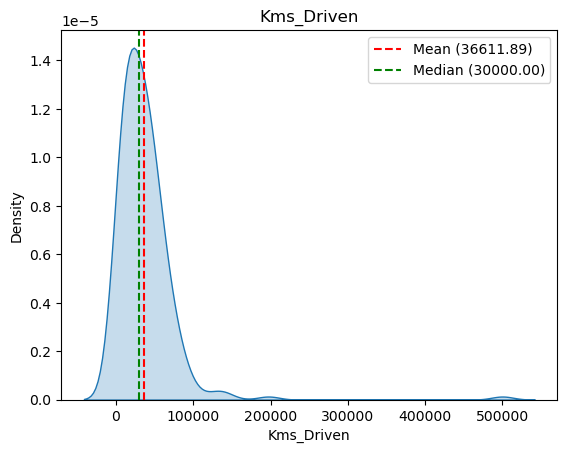

C:\Users\hp\AppData\Local\Temp\ipykernel_20252\2075184046.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_set[col], shade=True)


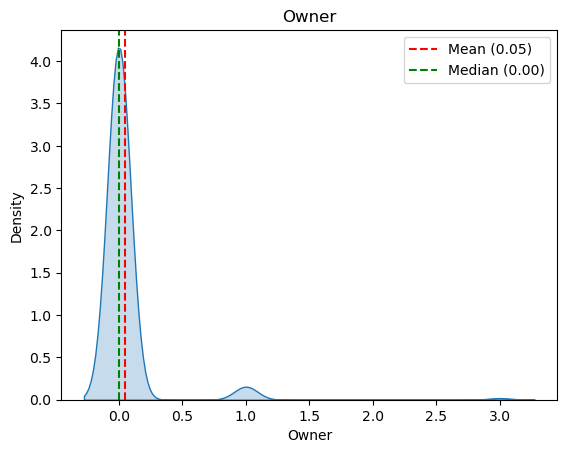

C:\Users\hp\AppData\Local\Temp\ipykernel_20252\2075184046.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(train_set[col], shade=True)


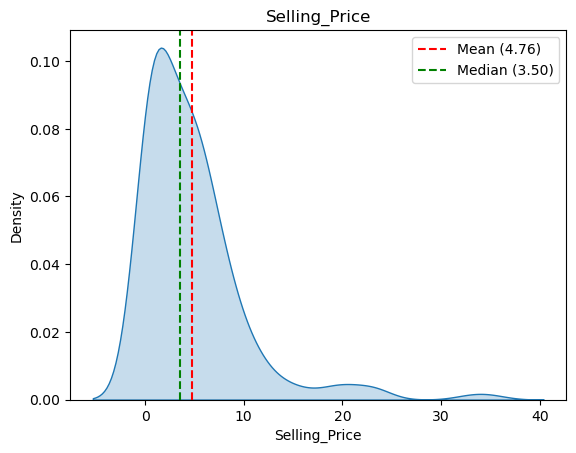

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# looping untuk melakukan visualisasi distribusi data setiap kolom menggunakan kdeplot dengan central tendency didalamnya
for col in train_set.columns:
    if train_set[col].dtype != 'object':
        ax = sns.kdeplot(train_set[col], shade=True)
        mean_val = train_set[col].mean()
        median_val = train_set[col].median()
        ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean ({mean_val:.2f})')
        ax.axvline(median_val, color='green', linestyle='--', label=f'Median ({median_val:.2f})')
        ax.set_title(col)
        plt.legend()
        plt.show()

## Melihat Proporsi Data secara Jumlah dan Persentase

## Melihat Jumlah Proporsi masing masing Kolom Kategori

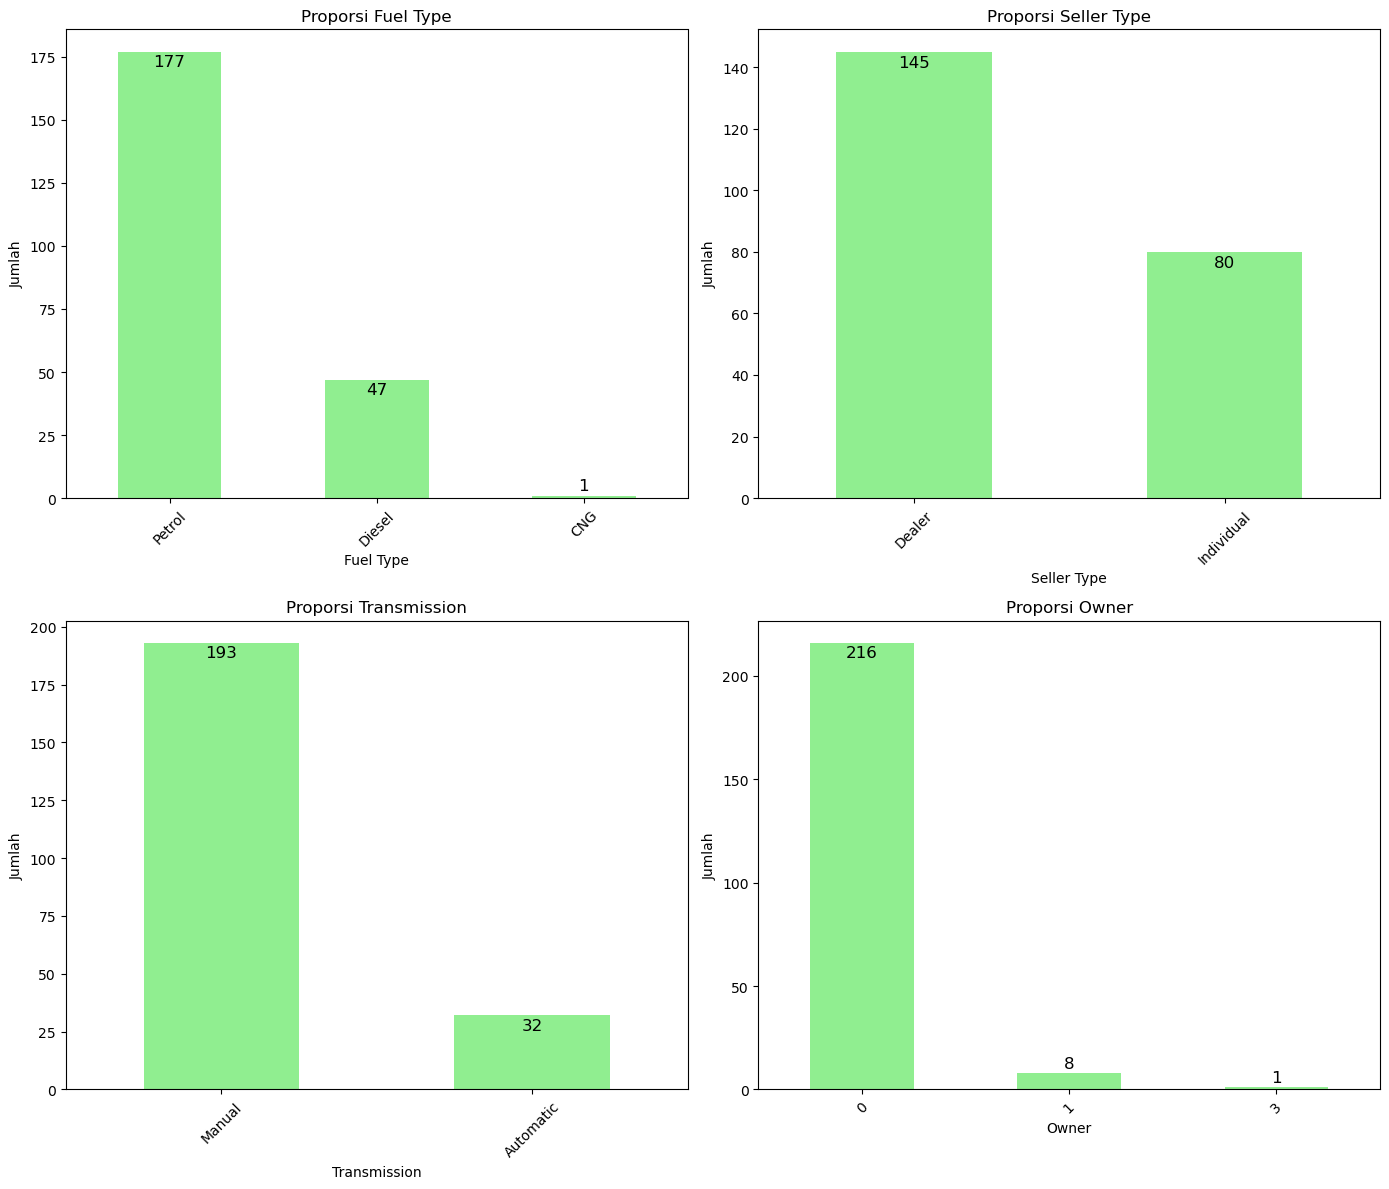

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Daftar kolom kategorikal yang ingin Anda analisis
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Mengatur jumlah baris dan kolom untuk subplot
num_rows = 2
num_cols = 2

# Menghitung jumlah total subplot
total_subplots = num_rows * num_cols

# Mengatur ukuran gambar
plt.figure(figsize=(14, 12))

# Menggunakan looping untuk menghitung dan memplot grafik batang untuk setiap kolom
for i, column in enumerate(categorical_columns):
    # Hitung jumlah kategori unik dalam kolom
    column_counts = train_set[column].value_counts()

    # Membuat subplot
    plt.subplot(num_rows, num_cols, i+1)

    # Membuat grafik batang untuk kolom
    ax = column_counts.plot(kind='bar', color='lightgreen')
    plt.title(f'Proporsi {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    
    # Menambahkan label jumlah di atas setiap batang
    for j, count in enumerate(column_counts):
        if count < 10:
            plt.text(j, count + 1, str(count), ha='center', va='bottom', fontsize=12)
        else:
            plt.text(j, count - 1, str(count), ha='center', va='top', fontsize=12)

# Mengatur tata letak subplot
plt.tight_layout()
plt.savefig('EDA_3_Proporsi_Data_Jumlah.png')
# Menampilkan subplot
plt.show()

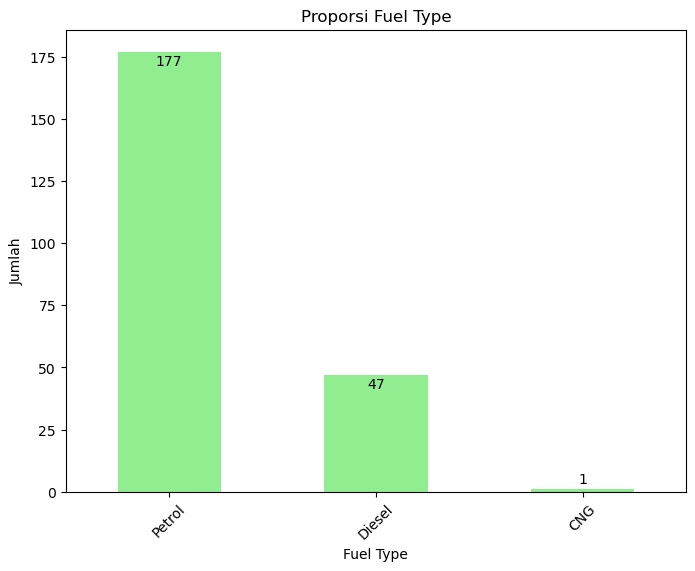

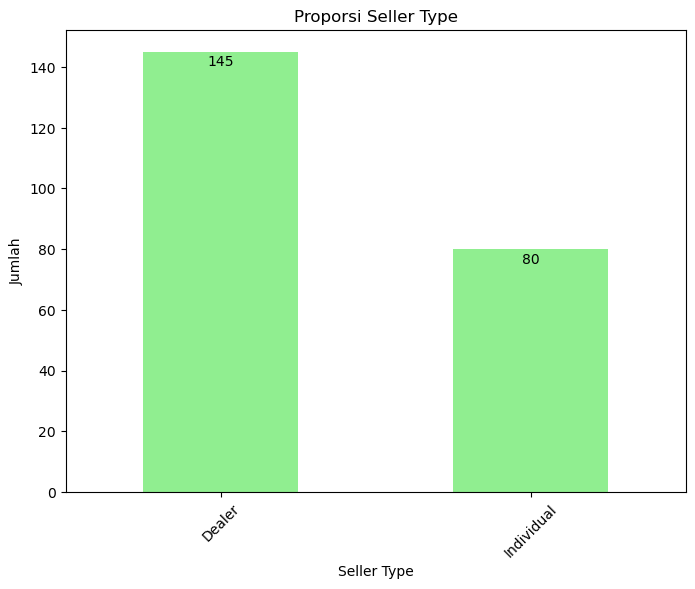

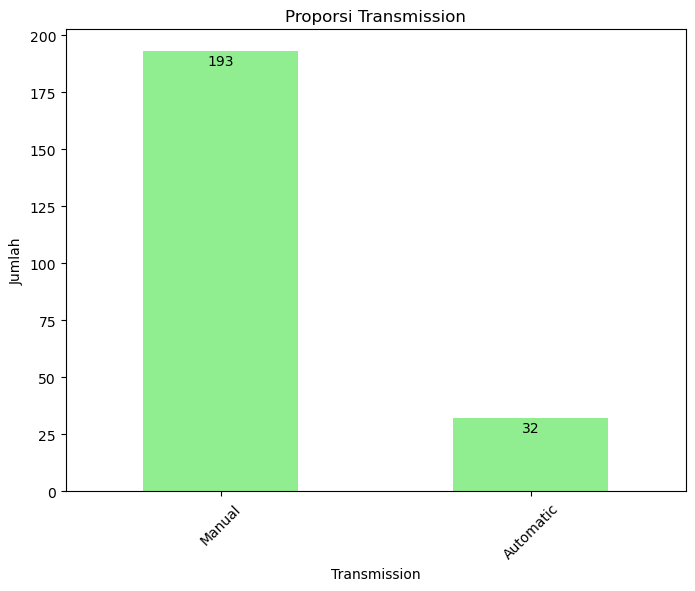

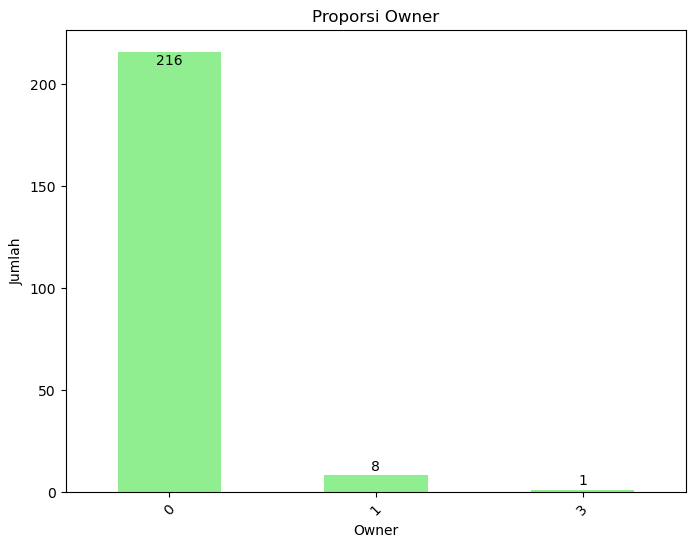

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Daftar kolom kategorikal yang ingin Anda analisis
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Menggunakan loop untuk menghitung dan memplot grafik batang untuk setiap kolom
for column in categorical_columns:
    # Hitung jumlah kategori unik dalam kolom
    column_counts = train_set[column].value_counts()

    # Buat grafik batang untuk kolom
    plt.figure(figsize=(8, 6))
    ax = column_counts.plot(kind='bar', color='lightgreen')
    plt.title(f'Proporsi {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    
    # Menambahkan label jumlah di atas setiap batang
    for i, count in enumerate(column_counts):
        if count < 10:
            plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)
        else:
            plt.text(i, count - 1, str(count), ha='center', va='top', fontsize=10)

    plt.show()


## Proporsi data kategori dalam bentuk persentase

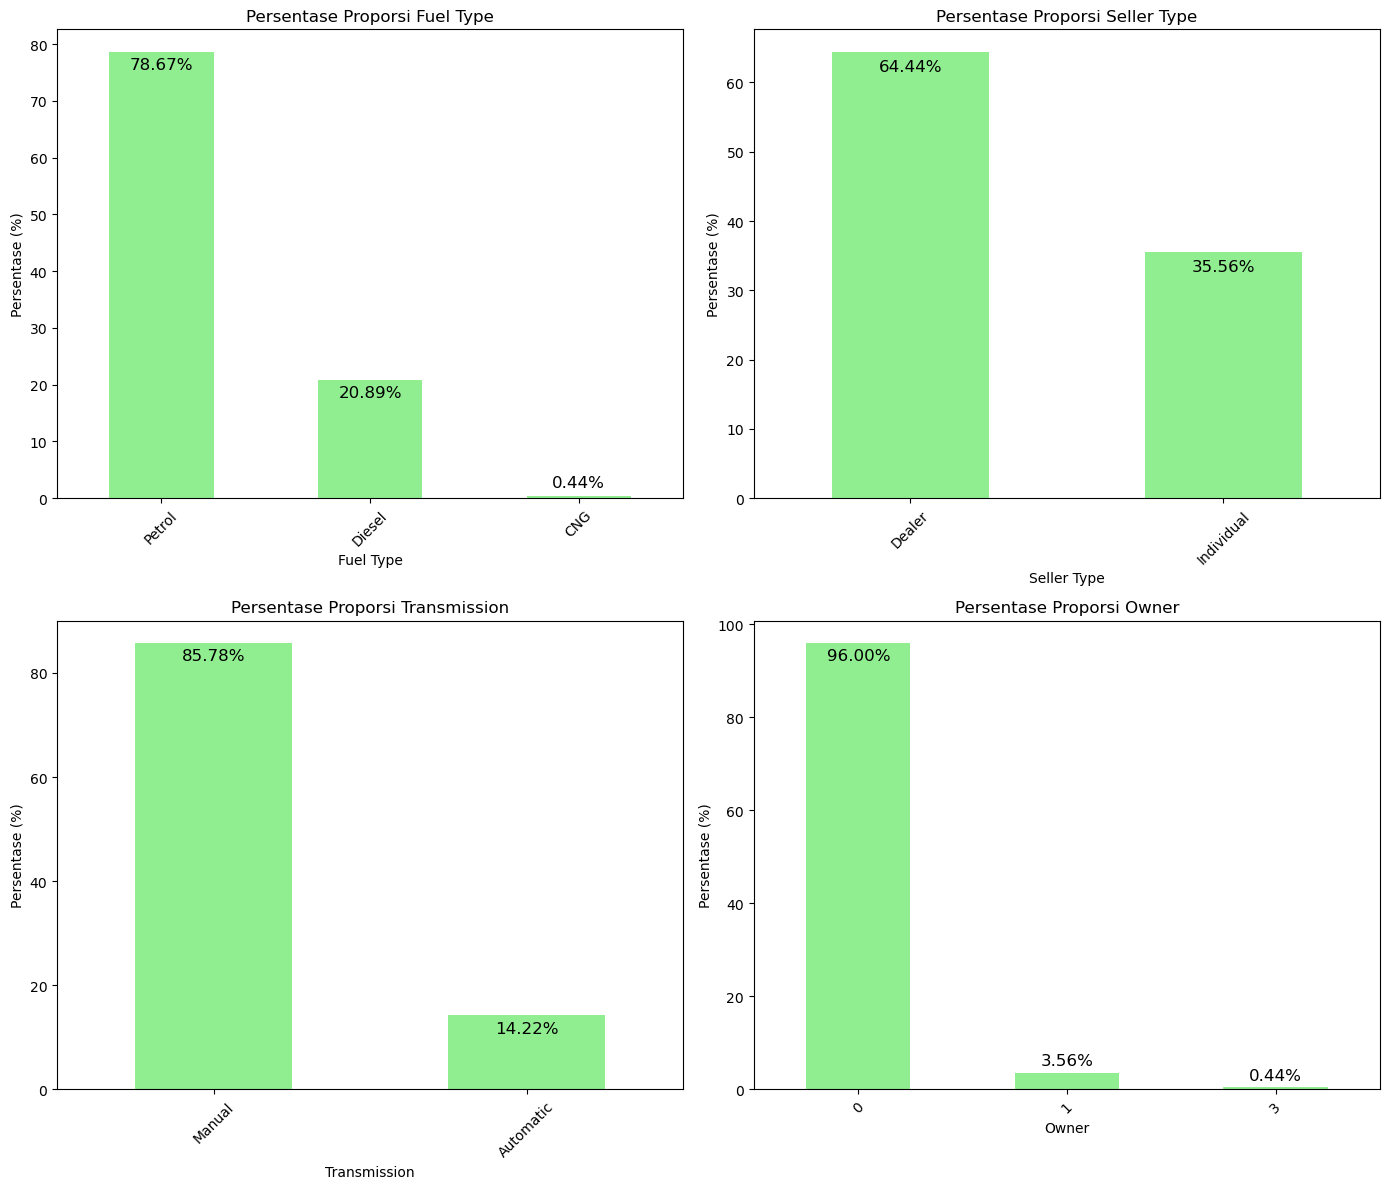

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Daftar kolom kategorikal yang ingin Anda analisis
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Mengatur jumlah baris dan kolom untuk subplot
num_rows = 2
num_cols = 2

# Menghitung jumlah total subplot
total_subplots = num_rows * num_cols

# Mengatur ukuran gambar
plt.figure(figsize=(14, 12))

# Menggunakan looping untuk menghitung dan memplot grafik batang untuk setiap kolom
for i, column in enumerate(categorical_columns):
    # Hitung jumlah kategori unik dalam kolom
    column_counts = train_set[column].value_counts()

    # Menghitung persentase proporsi
    column_percentages = (column_counts / len(train_set)) * 100

    # Membuat subplot
    plt.subplot(num_rows, num_cols, i+1)

    # Membuat grafik batang untuk kolom dengan persentase
    ax = column_percentages.plot(kind='bar', color='lightgreen')
    plt.title(f'Persentase Proporsi {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Persentase (%)')
    plt.xticks(rotation=45)
    
    # Menambahkan label persentase di atas setiap batang
    for j, percentage in enumerate(column_percentages):
        if percentage < 10:
            plt.text(j, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)
        else:
            plt.text(j, percentage - 1, f'{percentage:.2f}%', ha='center', va='top', fontsize=12)

# Mengatur tata letak subplot
plt.tight_layout()
plt.savefig('EDA_3_Proporsi_Data_Persentase.png')

# Menampilkan subplot
plt.show()

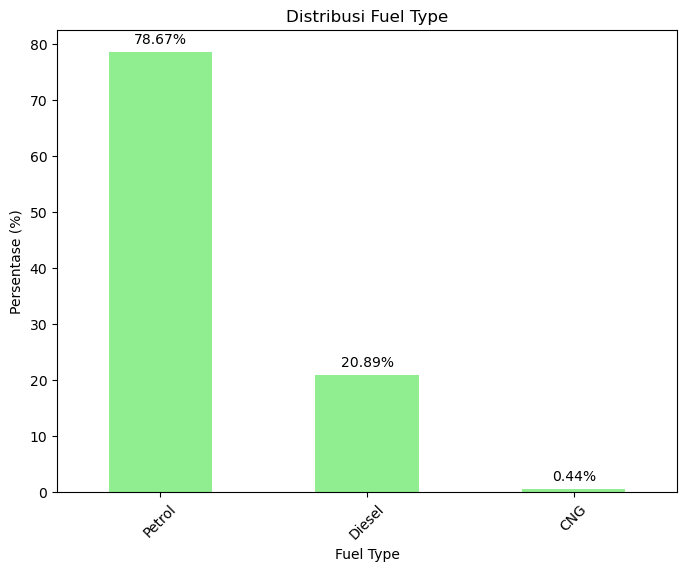

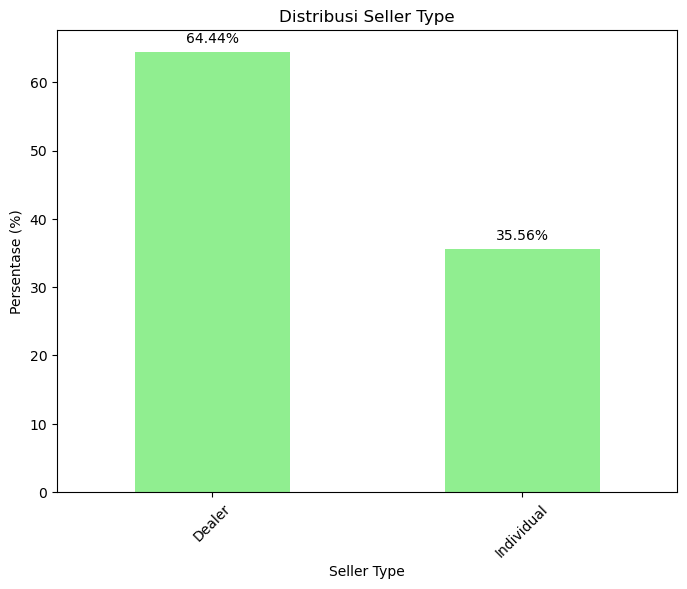

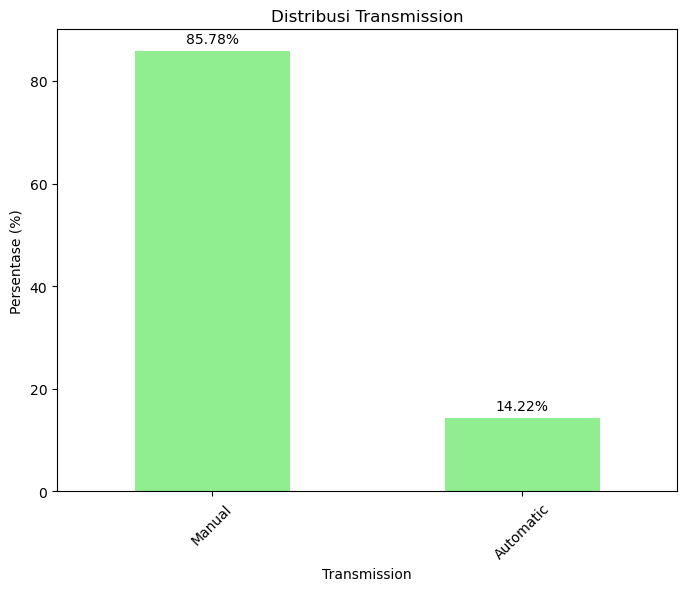

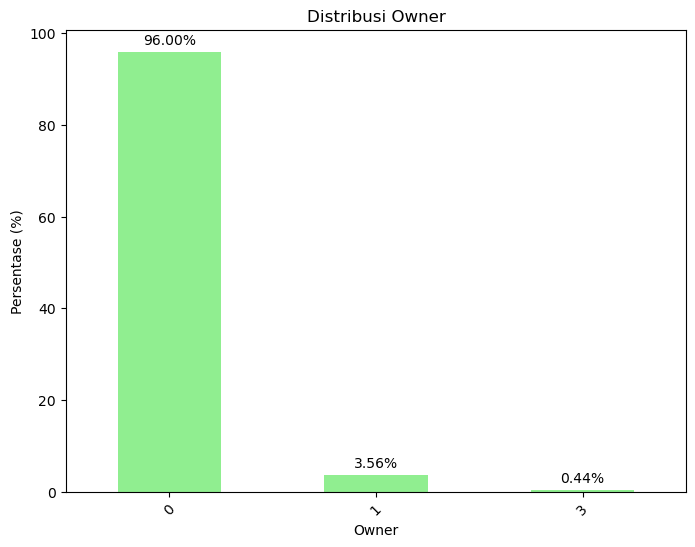

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Daftar kolom kategorikal yang ingin Anda analisis
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Menggunakan loop untuk menghitung dan memplot grafik batang untuk setiap kolom
for column in categorical_columns:
    # Hitung jumlah kategori unik dalam kolom
    column_counts = train_set[column].value_counts()

    # Menghitung total data dalam kolom
    total_data = len(train_set[column])

    # Menghitung persentase untuk setiap kategori
    column_percentages = (column_counts / total_data) * 100

    # Buat grafik batang untuk kolom
    plt.figure(figsize=(8, 6))
    ax = column_percentages.plot(kind='bar', color='lightgreen')
    plt.title(f'Distribusi {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Persentase (%)')
    plt.xticks(rotation=45)
    
    # Menambahkan label persentase di atas setiap batang
    for i, percentage in enumerate(column_percentages):
        plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)

    plt.show()

## Cek Korelasi

C:\Users\hp\AppData\Local\Temp\ipykernel_7932\3765649039.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_set.corr(method='pearson', min_periods=1),annot=True)


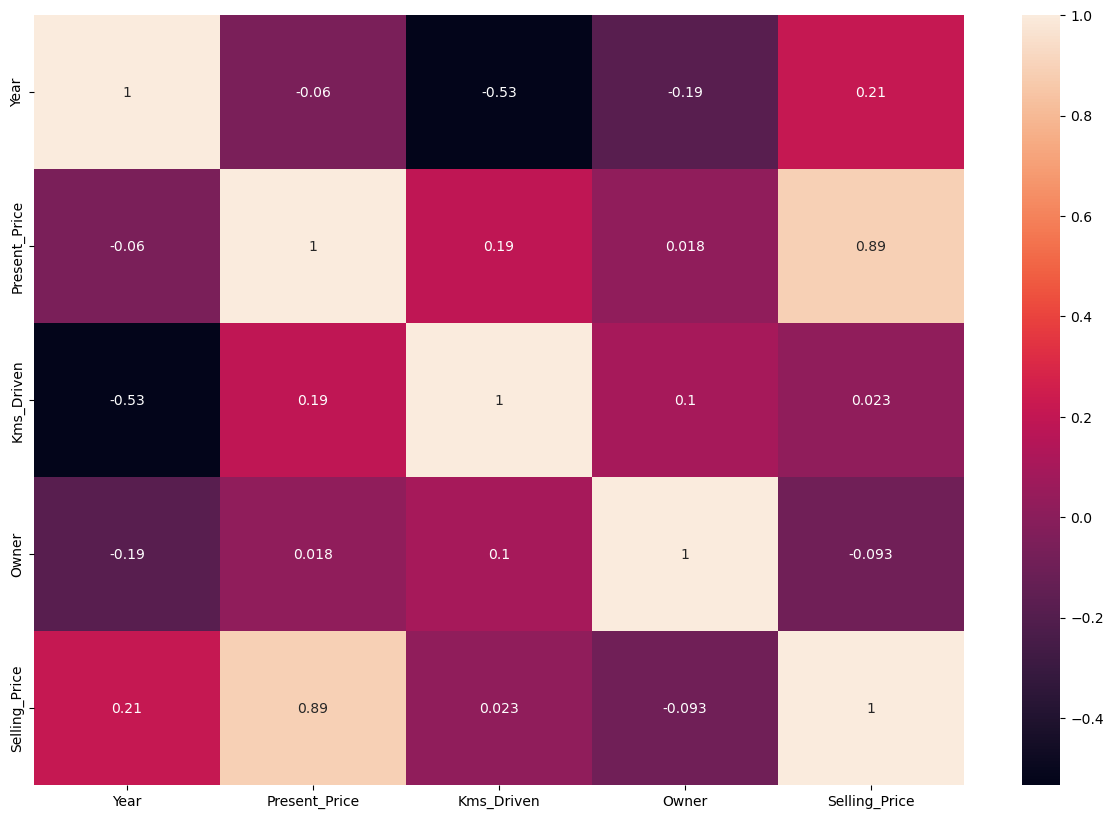

In [26]:
# pearson
plt.figure(figsize=(15,10))
sns.heatmap(train_set.corr(method='pearson', min_periods=1),annot=True)
plt.savefig('EDA_4_Correlation_Check.png')
plt.show()

## Cek Outlier dengan menggunakan Boxplot

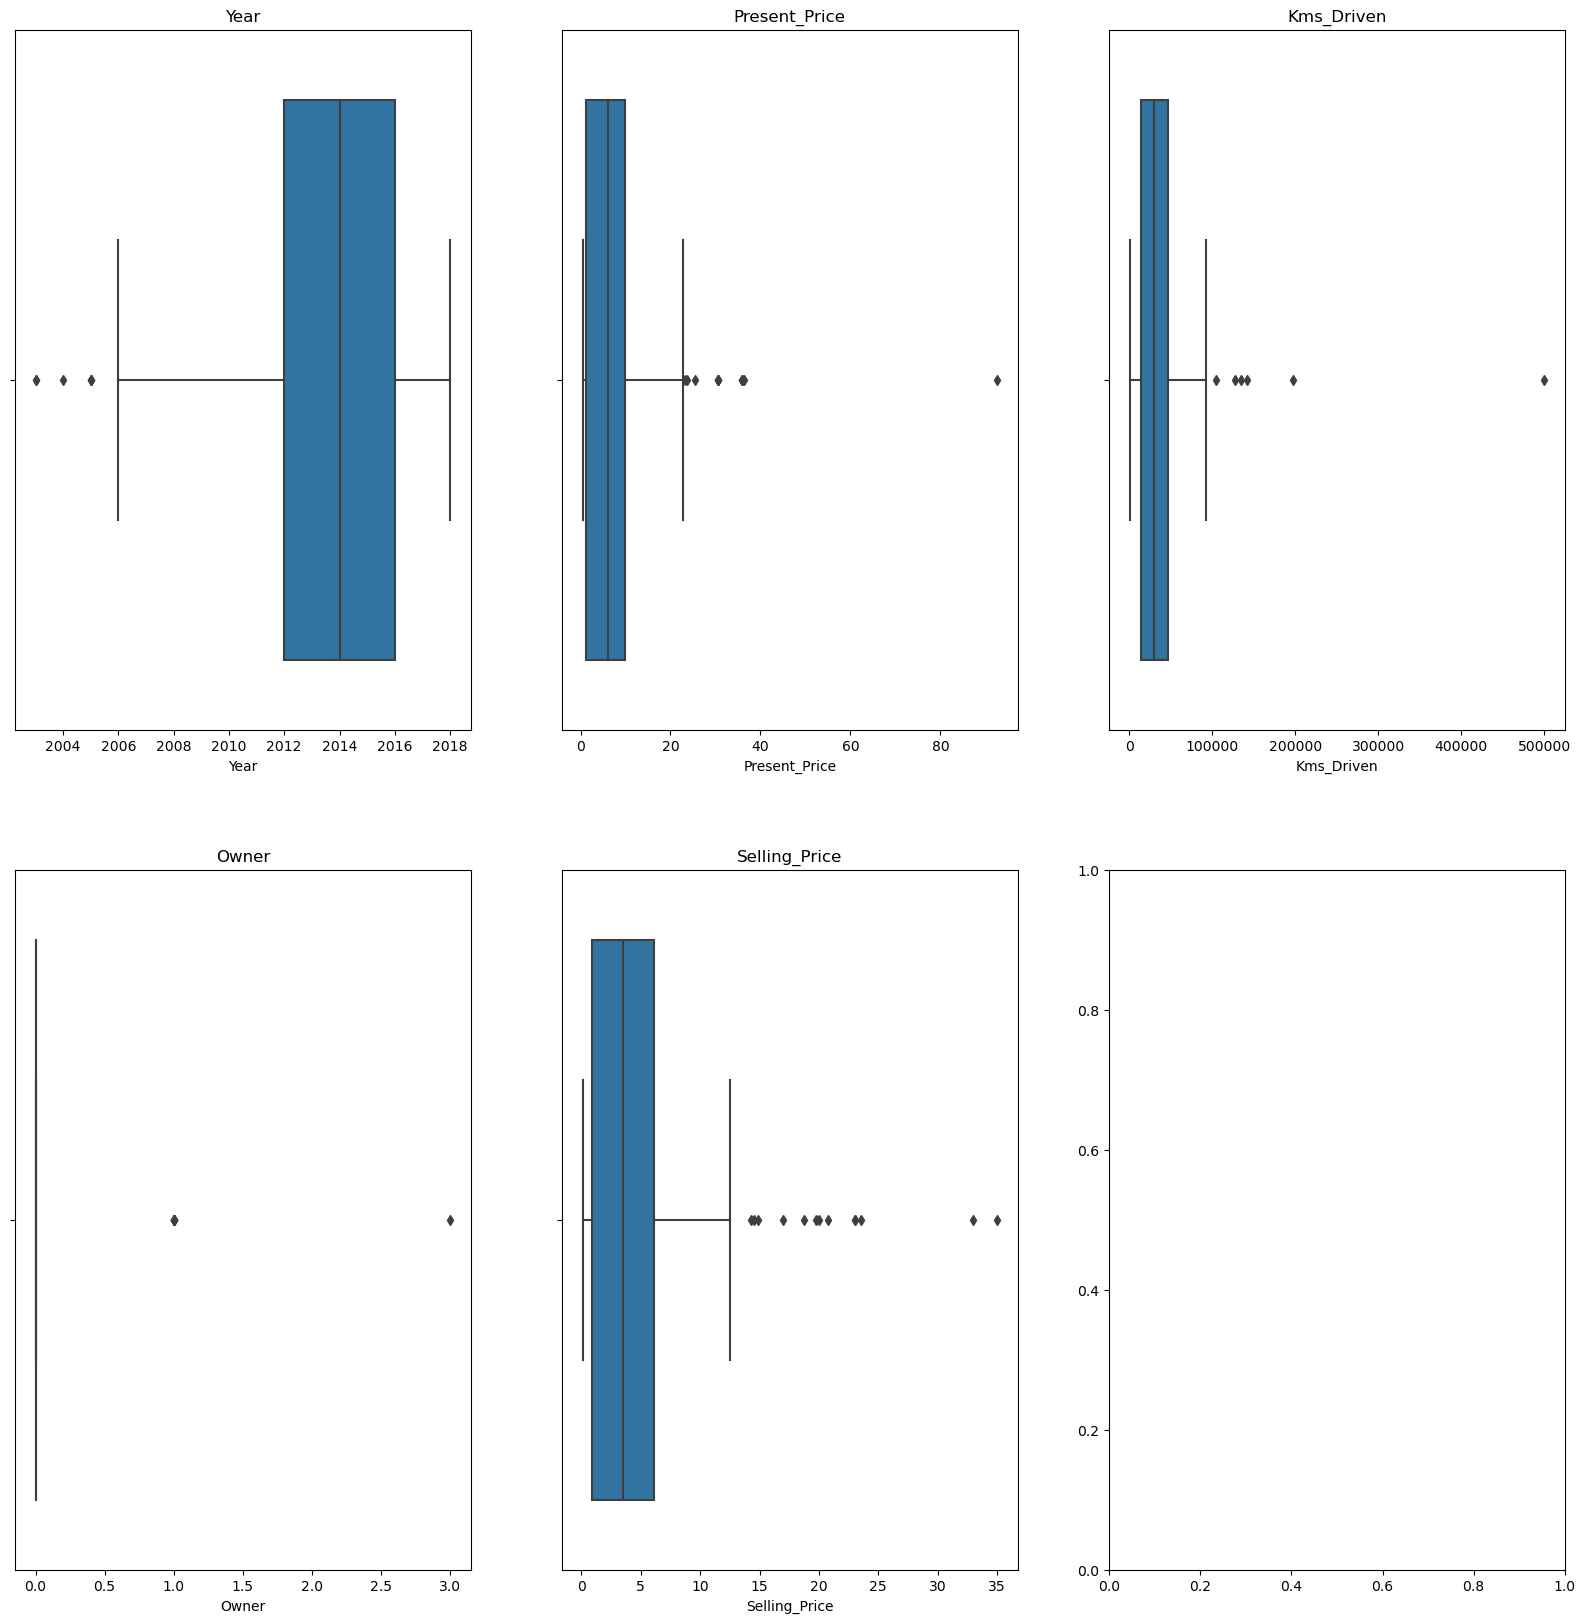

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# tentukan jumlah baris dan kolom subplots yang akan digunakan
num_rows = 2
num_cols = 3

# buat figure dan axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# buat list kolom yang ingin divisualisasikan
cols = [col for col in train_set.columns if train_set[col].dtype != 'object']

# looping untuk setiap kolom dan ubah indeksnya menjadi baris dan kolom
for i, col in enumerate(cols):
    row_index, col_index = np.unravel_index(i, (num_rows, num_cols))
    ax = axes[row_index, col_index]
    sns.boxplot(x=train_set[col], ax=ax)
    ax.set_title(col)
    
# menyimpan figure menjadi file gambar
plt.savefig('EDA_5_oulier_detection.png')

## Uji Hipotesis

### Membandingkan antar kelompok pada kolom Fuel berdasarkan selling_price

**Hipotesis Null ($H_0$)**: Rata-rata harga jual ('selling_price') antara berbagai kategori bahan bakar ('fuel') adalah sama.

$$ H_0: \mu_{\text{Petrol}} = \mu_{\text{Diesel}} = \mu_{\text{CNG}} $$

**Hipotesis Alternatif ($H_1$)**: Terdapat perbedaan signifikan dalam rata-rata harga jual ('selling_price') antara setidaknya dua kategori bahan bakar ('fuel').

$$ H_1: \text{Setidaknya satu } \mu_i \text{ berbeda dari yang lain} $$

Dalam hipotesis null, kita berasumsi bahwa tidak ada perbedaan signifikan dalam rata-rata harga jual antara kategori bahan bakar. Hipotesis alternatif menyatakan bahwa setidaknya satu dari rata-rata harga jual dalam kategori bahan bakar berbeda dari yang lainnya, yang mengindikasikan adanya perbedaan signifikan.

Uji Anova kemudian akan digunakan untuk menguji apakah terdapat perbedaan yang signifikan dalam rata-rata harga jual ('selling_price') antara kelompok kategori bahan bakar ('fuel').

In [20]:
import pandas as pd
from scipy import stats

In [21]:
# Menggunakan Anova untuk membandingkan 'selling_price' antara kategori 'fuel'
fuel_categories = train_set['Fuel_Type'].unique()
grouped_data = [train_set[train_set['Fuel_Type'] == category]['Selling_Price'] for category in fuel_categories]

# Melakukan uji Anova
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Menampilkan hasil uji statistik
print("Hasil Anova:")
print(f"Statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Menentukan apakah perbedaan signifikan
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'Fuel_Type'.")
else:
    print("Tidak terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'Fuel_Type'.")

Hasil Anova:
Statistic: 44.02894808090848
P-value: 7.852895544561943e-17
Terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'Fuel_Type'.


Hasil Anova yang Anda sertakan menunjukkan bahwa ada perbedaan signifikan dalam 'selling_price' antara kategori 'fuel'. Untuk memahami lebih lanjut apa arti dari hasil ini, mari kita jelaskan beberapa konsep yang terlibat:

1. **Statistic (Statistik):** Nilai statistik ini adalah hasil dari perhitungan statistik yang digunakan dalam uji Anova. Dalam konteks ini, itu adalah angka 44.02894808090848.

2. **P-value (Nilai P):** P-value adalah nilai probabilitas yang dihasilkan dari uji statistik. Ini mengukur sejauh mana perbedaan yang diamati antara kelompok-kelompok (dalam hal ini, kategori 'Fuel_Type') adalah hasil dari variasi acak atau jika perbedaan tersebut signifikan secara statistik. Pada kasus ini, nilai p-value sangat rendah, yaitu 7.852895544561943e-17 (sangat mendekati nol).

3. **Terdapat perbedaan signifikan:** Ketika p-value sangat rendah (umumnya kurang dari tingkat signifikansi yang telah ditentukan sebelumnya, dalam kasus ini 0.05), kita cenderung menolak hipotesis nol. Hipotesis nol dalam konteks ini adalah bahwa tidak ada perbedaan signifikan antara kelompok-kelompok. Dengan kata lain, hasil ini menunjukkan bahwa ada perbedaan signifikan dalam 'selling_price' antara kategori 'Fuel_Type'.

Dengan kata lain, berdasarkan hasil Anova yang Anda peroleh, dapat disimpulkan bahwa jenis bahan bakar (kategori 'Fuel_Type') memiliki pengaruh yang signifikan terhadap harga jual ('selling_price'). Perbedaan dalam jenis bahan bakar kendaraan dapat secara signifikan mempengaruhi harga penjualan. Hal ini bisa menjadi informasi yang sangat berharga dalam analisis data Anda, terutama jika Anda ingin memahami faktor-faktor apa yang memengaruhi harga jual kendaraan.

### Membandingkan antar kelompok pada kolom seller_type berdasarkan selling_price

**Hipotesis Null ($H_0$)**: Rata-rata harga jual ('selling_price') antara berbagai kategori jenis penjual ('seller_type') adalah sama.

$$ H_0: \mu_{\text{Individual}} = \mu_{\text{Dealer}}$$

**Hipotesis Alternatif ($H_1$)**: Terdapat perbedaan signifikan dalam rata-rata harga jual ('selling_price') antara setidaknya dua kategori jenis penjual ('seller_type').

$$ H_1: \text{Setidaknya satu } \mu_i \text{ berbeda dari yang lain} $$

Dalam hipotesis null, kita berasumsi bahwa tidak ada perbedaan signifikan dalam rata-rata harga jual antara kategori jenis penjual. Hipotesis alternatif menyatakan bahwa setidaknya satu dari rata-rata harga jual dalam kategori jenis penjual berbeda dari yang lainnya, yang mengindikasikan adanya perbedaan signifikan.

In [22]:
 train_set['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [23]:
import numpy as np
import scipy.stats as stats

# Data untuk dua kelompok (contoh sintetis)
group1 = train_set[train_set['Seller_Type'] == 'Individual']['Selling_Price']
group2 = train_set[train_set['Seller_Type'] == 'Dealer']['Selling_Price']

# Uji Normalitas dengan Shapiro-Wilk
_, p_value_group1 = stats.shapiro(group1)
_, p_value_group2 = stats.shapiro(group2)

# Uji Homoskedastisitas dengan Levene's Test
_, p_value_homoskedastisitas = stats.levene(group1, group2)

# Menampilkan hasil uji statistik
print("Hasil uji normalitas (Shapiro-Wilk):")
print(f"P-value Group 1: {p_value_group1}")
print(f"P-value Group 2: {p_value_group2}")

print("\nHasil uji homoskedastisitas (Levene's Test):")
print(f"P-value: {p_value_homoskedastisitas}")

# Menentukan apakah perbedaan signifikan
alpha = 0.05
if p_value_group1 < alpha or p_value_group2 < alpha:
    print("Salah satu dari kelompok tidak berdistribusi normal.")
else:
    print("Kedua kelompok berdistribusi normal.")

if p_value_homoskedastisitas < alpha:
    print("Tidak ada homoskedastisitas antara kedua kelompok.")
else:
    print("Terdapat homoskedastisitas antara kedua kelompok.")


Hasil uji normalitas (Shapiro-Wilk):
P-value Group 1: 1.0327510195770259e-13
P-value Group 2: 5.195343497587084e-15

Hasil uji homoskedastisitas (Levene's Test):
P-value: 1.2975953504528193e-07
Salah satu dari kelompok tidak berdistribusi normal.
Tidak ada homoskedastisitas antara kedua kelompok.


In [24]:
import numpy as np
import scipy.stats as stats

# Membagi data menjadi dua kelompok
group1 = train_set[train_set['Seller_Type'] == 'Individual']['Selling_Price']
group2 = train_set[train_set['Seller_Type'] == 'Dealer']['Selling_Price']

# Melakukan Uji Mann-Whitney U
u_statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Menampilkan hasil uji statistik
print("Hasil Uji Mann-Whitney U:")
print(f"U-Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Menentukan apakah perbedaan signifikan
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'seller_type'.")
else:
    print("Tidak terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'seller_type'.")

Hasil Uji Mann-Whitney U:
U-Statistic: 119.5
P-value: 5.523061816009205e-34
Terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'seller_type'.


Hasil Uji Mann-Whitney U yang disajikan menunjukkan bahwa ada perbedaan signifikan dalam 'selling_price' antara kategori 'seller_type'. Untuk menguraikan lebih lanjut arti dari hasil ini, mari kita bahas beberapa konsep penting:

Penjelasan:

1. **U-Statistic (Statistik U)**: Nilai statistik U adalah hasil dari Uji Mann-Whitney U yang digunakan untuk membandingkan median 'selling_price' antara kedua kelompok yang berbeda. Dalam kasus ini, statistik U memiliki nilai sekitar 119.5.

2. **P-value (Nilai P)**: P-value adalah nilai probabilitas yang dihasilkan dari Uji Mann-Whitney U. Ini mengukur sejauh mana perbedaan median 'selling_price' antara kedua kelompok 'seller_type' adalah hasil dari variasi acak atau jika perbedaan tersebut signifikan secara statistik. Nilai P yang sangat rendah, sekitar 5.52e-34, menunjukkan bahwa perbedaan yang diamati sangat tidak mungkin disebabkan oleh kebetulan.

3. **Terdapat perbedaan signifikan**: Ketika nilai P sangat rendah (biasanya lebih rendah dari tingkat signifikansi yang telah ditentukan sebelumnya, dalam kasus ini 0.05), kita dapat menarik kesimpulan bahwa terdapat perbedaan signifikan dalam median 'selling_price' antara kedua kategori 'seller_type'. Artinya, jenis penjual ('seller_type') memengaruhi secara signifikan harga jual ('selling_price') kendaraan.

Hasil ini memiliki implikasi penting dalam analisis data. Ini menunjukkan bahwa jenis penjual yang berbeda, yang mungkin memiliki strategi penjualan yang berbeda atau audiens yang berbeda, dapat memiliki dampak yang signifikan pada median harga jual kendaraan. Dengan pemahaman ini, bisnis atau organisasi dapat mengambil tindakan yang sesuai, seperti menyesuaikan strategi harga atau pemasaran berdasarkan jenis penjual untuk mengoptimalkan penjualan dan keuntungan.

### Membandingkan antar kelompok pada kolom transmission berdasarkan selling_price

**Hipotesis Null ($H_0$):** Rata-rata harga jual ('selling_price') antara berbagai kategori transmisi ('transmission') adalah sama.

$$  H_0: \mu_{Automatic} = \mu_{Manual}  $$ 

**Hipotesis Alternatif ($H_1$):** Terdapat perbedaan signifikan dalam rata-rata harga jual ('selling_price') antara setidaknya dua kategori transmisi ('transmission').

$$ H_1: \text{Setidaknya satu } \mu_i \text{ berbeda dari yang lain}$$ 

Dalam hipotesis null, kita berasumsi bahwa tidak ada perbedaan signifikan dalam rata-rata harga jual antara kategori transmisi. Hipotesis alternatif menyatakan bahwa setidaknya satu dari rata-rata harga jual dalam kategori transmisi berbeda dari yang lainnya, yang mengindikasikan adanya perbedaan signifikan.

In [25]:
import numpy as np
import scipy.stats as stats

# Data untuk dua kelompok (contoh sintetis)
group1 = train_set[train_set['Transmission'] == 'Manual']['Selling_Price']
group2 = train_set[train_set['Transmission'] == 'Automatic']['Selling_Price']

# Uji Normalitas dengan Shapiro-Wilk
_, p_value_group1 = stats.shapiro(group1)
_, p_value_group2 = stats.shapiro(group2)

# Uji Homoskedastisitas dengan Levene's Test
_, p_value_homoskedastisitas = stats.levene(group1, group2)

# Menampilkan hasil uji statistik
print("Hasil uji normalitas (Shapiro-Wilk):")
print(f"P-value Manual: {p_value_group1}")
print(f"P-value Automatic: {p_value_group2}")

print("\nHasil uji homoskedastisitas (Levene's Test):")
print(f"P-value: {p_value_homoskedastisitas}")

# Menentukan apakah perbedaan signifikan
alpha = 0.05
if p_value_group1 < alpha or p_value_group2 < alpha:
    print("Salah satu dari kelompok tidak berdistribusi normal.")
else:
    print("Kedua kelompok berdistribusi normal.")

if p_value_homoskedastisitas < alpha:
    print("Tidak ada homoskedastisitas antara kedua kelompok.")
else:
    print("Terdapat homoskedastisitas antara kedua kelompok.")

Hasil uji normalitas (Shapiro-Wilk):
P-value Manual: 7.281415498931146e-16
P-value Automatic: 0.0016475656302645802

Hasil uji homoskedastisitas (Levene's Test):
P-value: 1.1253608466966135e-09
Salah satu dari kelompok tidak berdistribusi normal.
Tidak ada homoskedastisitas antara kedua kelompok.


In [26]:
import numpy as np
import scipy.stats as stats

# Membagi data menjadi dua kelompok
group1 = train_set[train_set['Transmission'] == 'Manual']['Selling_Price']
group2 = train_set[train_set['Transmission'] == 'Automatic']['Selling_Price']

# Melakukan Uji Mann-Whitney U
u_statistic, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')

# Menampilkan hasil uji statistik
print("Hasil Uji Mann-Whitney U:")
print(f"U-Statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Menentukan apakah perbedaan signifikan
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam 'selling_price' antara kelompok 'Manual' dan 'Automatic' pada kolom 'Transmission'.")
else:
    print("Tidak terdapat perbedaan signifikan dalam 'selling_price' antara kelompok 'Manual' dan 'Automatic' pada kolom 'Transmission'.")

Hasil Uji Mann-Whitney U:
U-Statistic: 2177.0
P-value: 0.007587514850091131
Terdapat perbedaan signifikan dalam 'selling_price' antara kelompok 'Manual' dan 'Automatic' pada kolom 'Transmission'.


**Hasil Uji Mann-Whitney U**:
- **Statistik U (U-Statistic)**: Nilai statistik U adalah hasil dari Uji Mann-Whitney U yang digunakan untuk membandingkan median 'selling_price' antara kedua kelompok yang berbeda. Dalam kasus ini, statistik U memiliki nilai sebesar 2177.0.

- **P-value (Nilai P)**: P-value adalah nilai probabilitas yang dihasilkan dari Uji Mann-Whitney U. Ini mengukur sejauh mana perbedaan median 'selling_price' antara kedua kelompok 'Manual' dan 'Automatic' pada kolom 'Transmission' adalah hasil dari variasi acak atau jika perbedaan tersebut signifikan secara statistik. Nilai P sekitar 0.0076, yang lebih rendah dari tingkat signifikansi 0.05, menunjukkan bahwa perbedaan median 'selling_price' antara kedua kelompok ini adalah signifikan secara statistik.

- **Terdapat perbedaan signifikan**: Karena nilai P lebih rendah dari tingkat signifikansi yang ditetapkan (0.05), kita dapat menyimpulkan bahwa ada perbedaan signifikan dalam median 'selling_price' antara kelompok 'Manual' dan 'Automatic' pada kolom 'Transmission'. Ini mengindikasikan bahwa jenis transmisi kendaraan ('Transmission') secara signifikan memengaruhi harga jual ('selling_price') kendaraan.

Hasil ini dapat memberikan wawasan berharga dalam pengambilan keputusan terkait dengan jenis transmisi kendaraan, seperti penentuan harga atau strategi pemasaran yang lebih tepat untuk masing-masing jenis transmisi.

### Membandingkan antar kelompok pada kolom owner berdasarkan selling_price

**Hipotesis Null (\(H_0\)):** Rata-rata harga jual ('selling_price') antara berbagai kategori kepemilikan ('owner') adalah sama.

$$ H_0: \mu_{0} = \mu_{1} = \mu_{3} $$

**Hipotesis Alternatif (\(H_1\)):** Terdapat perbedaan signifikan dalam rata-rata harga jual ('selling_price') antara setidaknya dua kategori kepemilikan ('owner').

$$ H_1: \text{Setidaknya satu } \mu_i \text{ berbeda dari yang lain} $$

Dalam hipotesis null, kita berasumsi bahwa tidak ada perbedaan signifikan dalam rata-rata harga jual antara kategori kepemilikan. Hipotesis alternatif menyatakan bahwa setidaknya satu dari rata-rata harga jual dalam kategori kepemilikan berbeda dari yang lainnya, yang mengindikasikan adanya perbedaan signifikan.

Uji Anova kemudian akan digunakan untuk menguji apakah terdapat perbedaan yang signifikan dalam rata-rata harga jual ('selling_price') antara kelompok kategori kepemilikan ('owner').

In [27]:
train_set['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [28]:
# Menggunakan Anova untuk membandingkan 'selling_price' antara kategori 'owner'
owner_categories = train_set['Owner'].unique()
grouped_data = [train_set[train_set['Owner'] == category]['Selling_Price'] for category in owner_categories]

# Melakukan uji Anova
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Menampilkan hasil uji statistik
print("Hasil Anova:")
print(f"Statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Menentukan apakah perbedaan signifikan
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'owner'.")
else:
    print("Tidak terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'owner'.")

Hasil Anova:
Statistic: 1.3497317625101188
P-value: 0.26142927583609643
Tidak terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'owner'.


Hasil Anova yang Anda sajikan menunjukkan bahwa tidak ada perbedaan signifikan dalam 'selling_price' antara berbagai kategori 'owner'. Untuk menguraikan lebih lanjut arti dari hasil ini, mari kita bahas beberapa konsep penting:

1. **Statistic (Statistik)**: Nilai statistik ini adalah hasil dari uji Anova yang digunakan untuk membandingkan rata-rata 'selling_price' antara kelompok-kelompok yang berbeda. Dalam kasus ini, statistik memiliki nilai sekitar 1.35.

2. **P-value (Nilai P)**: P-value adalah nilai probabilitas yang dihasilkan dari uji statistik. Ini mengukur sejauh mana perbedaan dalam 'selling_price' antara kelompok-kelompok 'owner' adalah hasil dari variasi acak atau jika perbedaan tersebut signifikan secara statistik. Nilai P yang cukup tinggi, sekitar 0.26, menunjukkan bahwa perbedaan yang diamati kemungkinan besar disebabkan oleh kebetulan.

3. **Tidak terdapat perbedaan signifikan**: Ketika nilai P tinggi (biasanya lebih tinggi dari tingkat signifikansi yang telah ditentukan sebelumnya, dalam kasus ini 0.05), kita tidak memiliki cukup bukti statistik untuk menyatakan bahwa terdapat perbedaan signifikan dalam 'selling_price' antara kategori 'owner'. Dengan kata lain, jenis owner ('owner') kemungkinan tidak memiliki dampak signifikan pada harga jual ('selling_price') kendaraan berdasarkan data yang dianalisis.

Dalam konteks ini, hasil ini menunjukkan bahwa perbedaan dalam kategori 'owner' tidak begitu penting dalam menjelaskan variasi dalam harga jual kendaraan. Hal ini dapat memandu kebijakan harga atau strategi pemasaran yang lebih umum daripada yang berfokus pada jenis kepemilikan kendaraan.

## Melacak Tren dari masing-masing kolom berdasarkan rata-rata harga jual atau selling_price

### Tren Temporal Selling Price dan Km Driven

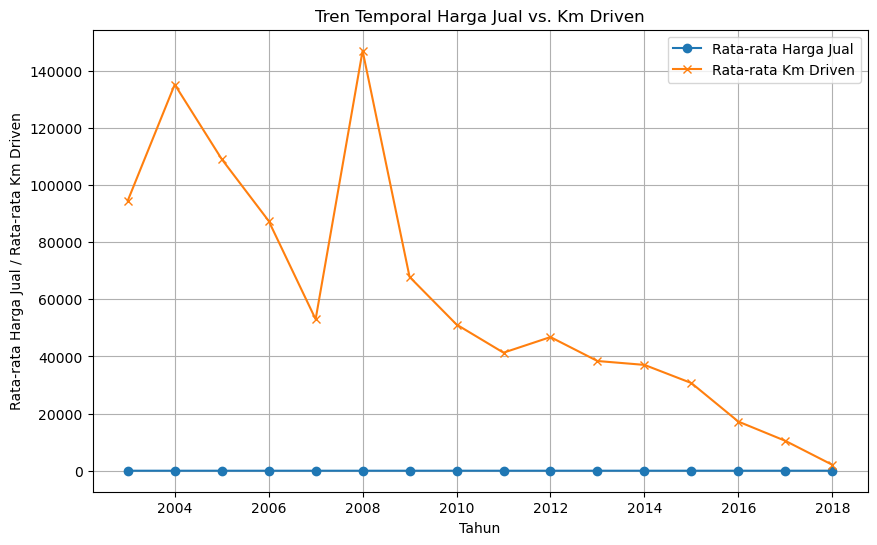

In [29]:
# Mengelompokkan data berdasarkan tahun pembuatan ('year')
grouped = train_set.groupby('Year')

# Menghitung rata-rata harga jual dan kilometer yang ditempuh setiap tahun
avg_selling_price = grouped['Selling_Price'].mean()
avg_km_driven = grouped['Kms_Driven'].mean()

# Membuat plot tren harga jual dan kilometer yang ditempuh
plt.figure(figsize=(10, 6))
plt.plot(avg_selling_price.index, avg_selling_price.values, marker='o', label='Rata-rata Harga Jual')
plt.plot(avg_km_driven.index, avg_km_driven.values, marker='x', label='Rata-rata Km Driven')
plt.title('Tren Temporal Harga Jual vs. Km Driven')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga Jual / Rata-rata Km Driven')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

### Tren Temporal Selling Price dan fuel

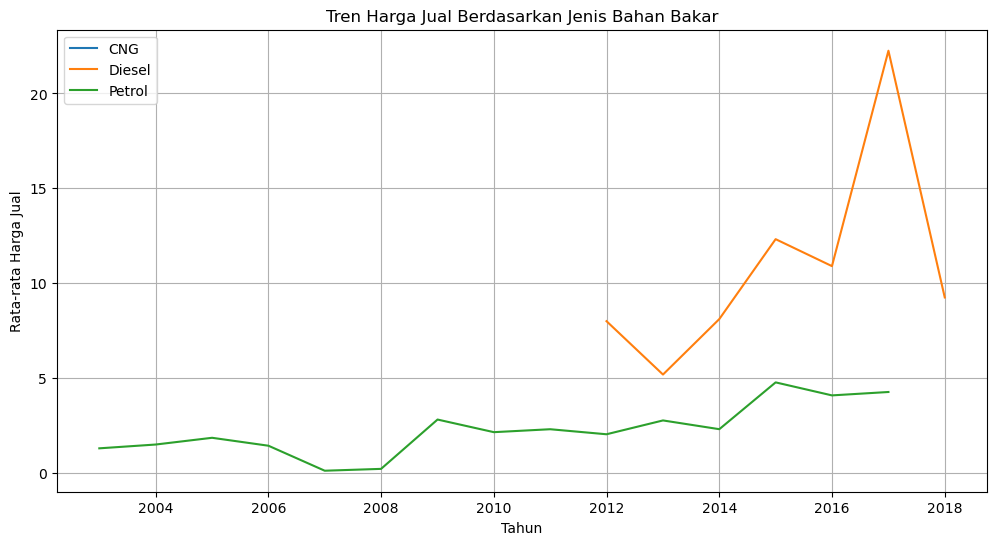

In [30]:
# Pastikan kolom 'year' adalah dalam format datetime
train_set['Year'] = pd.to_datetime(train_set['Year'], format='%Y')

# Kelompokkan data berdasarkan tahun dan jenis bahan bakar
grouped = train_set.groupby(['Year', 'Fuel_Type'])

# Hitung rata-rata harga jual untuk setiap kombinasi tahun dan jenis bahan bakar
avg_selling_price = grouped['Selling_Price'].mean().unstack()

# Membuat plot tren harga jual berdasarkan jenis bahan bakar
plt.figure(figsize=(12, 6))
for fuel_type in avg_selling_price.columns:
    plt.plot(avg_selling_price.index, avg_selling_price[fuel_type], label=fuel_type)

plt.title('Tren Harga Jual Berdasarkan Jenis Bahan Bakar')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga Jual')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

### Tren Temporal Selling Price dan transmission

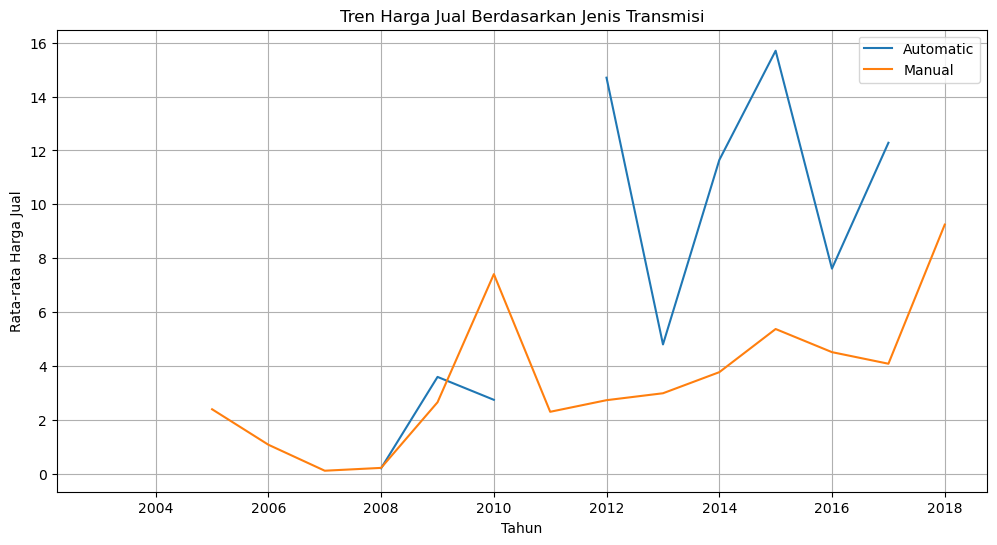

In [31]:
# Pastikan kolom 'year' adalah dalam format datetime
train_set['Year'] = pd.to_datetime(train_set['Year'], format='%Y')

# Kelompokkan data berdasarkan tahun dan jenis transmisi
grouped = train_set.groupby(['Year', 'Transmission'])

# Hitung rata-rata harga jual untuk setiap kombinasi tahun dan jenis transmisi
avg_selling_price = grouped['Selling_Price'].mean().unstack()

# Membuat plot tren harga jual berdasarkan jenis transmisi
plt.figure(figsize=(12, 6))
for transmission_type in avg_selling_price.columns:
    plt.plot(avg_selling_price.index, avg_selling_price[transmission_type], label=transmission_type)

plt.title('Tren Harga Jual Berdasarkan Jenis Transmisi')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga Jual')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

### Tren Temporal Selling Price dan seller_type

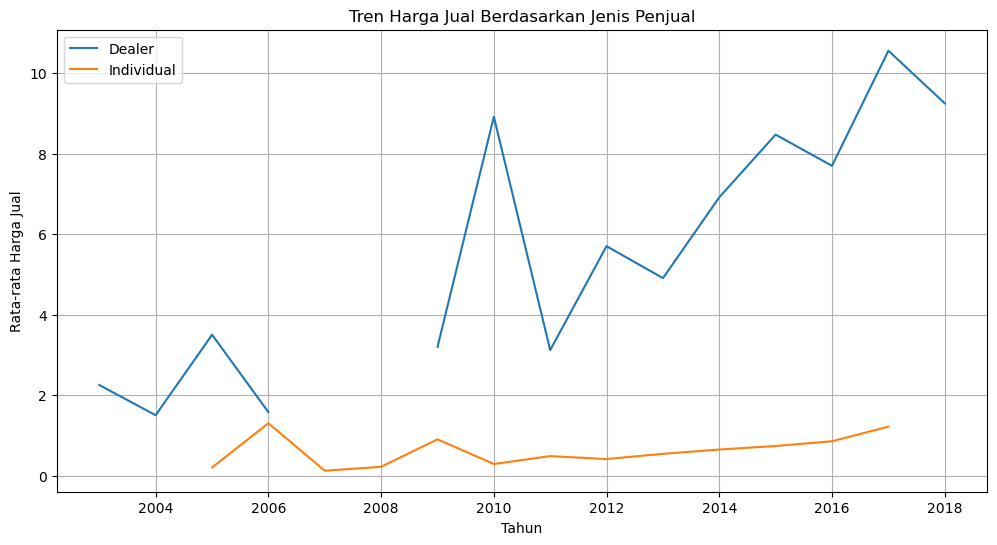

In [32]:
# Pastikan kolom 'year' adalah dalam format datetime
train_set['Year'] = pd.to_datetime(train_set['Year'], format='%Y')

# Kelompokkan data berdasarkan tahun dan jenis penjual
grouped = train_set.groupby(['Year', 'Seller_Type'])

# Hitung rata-rata harga jual untuk setiap kombinasi tahun dan jenis penjual
avg_selling_price = grouped['Selling_Price'].mean().unstack()

# Membuat plot tren harga jual berdasarkan jenis penjual
plt.figure(figsize=(12, 6))
for seller_type in avg_selling_price.columns:
    plt.plot(avg_selling_price.index, avg_selling_price[seller_type], label=seller_type)

plt.title('Tren Harga Jual Berdasarkan Jenis Penjual')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga Jual')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

### Tren Temporal Selling Price dan owner

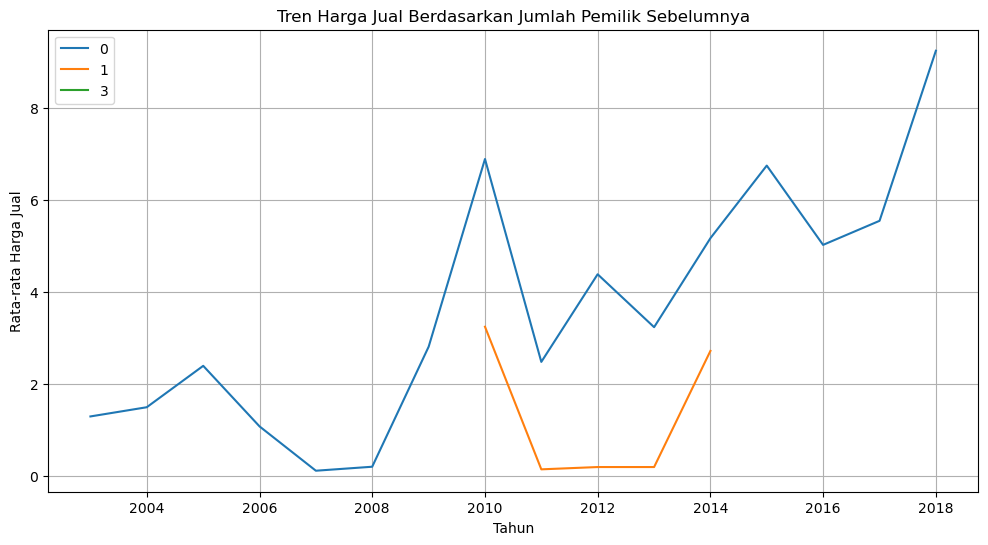

In [33]:
# Pastikan kolom 'year' adalah dalam format datetime
train_set['Year'] = pd.to_datetime(train_set['Year'], format='%Y')

# Kelompokkan data berdasarkan tahun dan jumlah pemilik sebelumnya
grouped = train_set.groupby(['Year', 'Owner'])

# Hitung rata-rata harga jual untuk setiap kombinasi tahun dan jumlah pemilik sebelumnya
avg_selling_price = grouped['Selling_Price'].mean().unstack()

# Membuat plot tren harga jual berdasarkan jumlah pemilik sebelumnya
plt.figure(figsize=(12, 6))
for owner_type in avg_selling_price.columns:
    plt.plot(avg_selling_price.index, avg_selling_price[owner_type], label=owner_type)

plt.title('Tren Harga Jual Berdasarkan Jumlah Pemilik Sebelumnya')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga Jual')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

## Pair Plot

<Figure size 640x480 with 0 Axes>

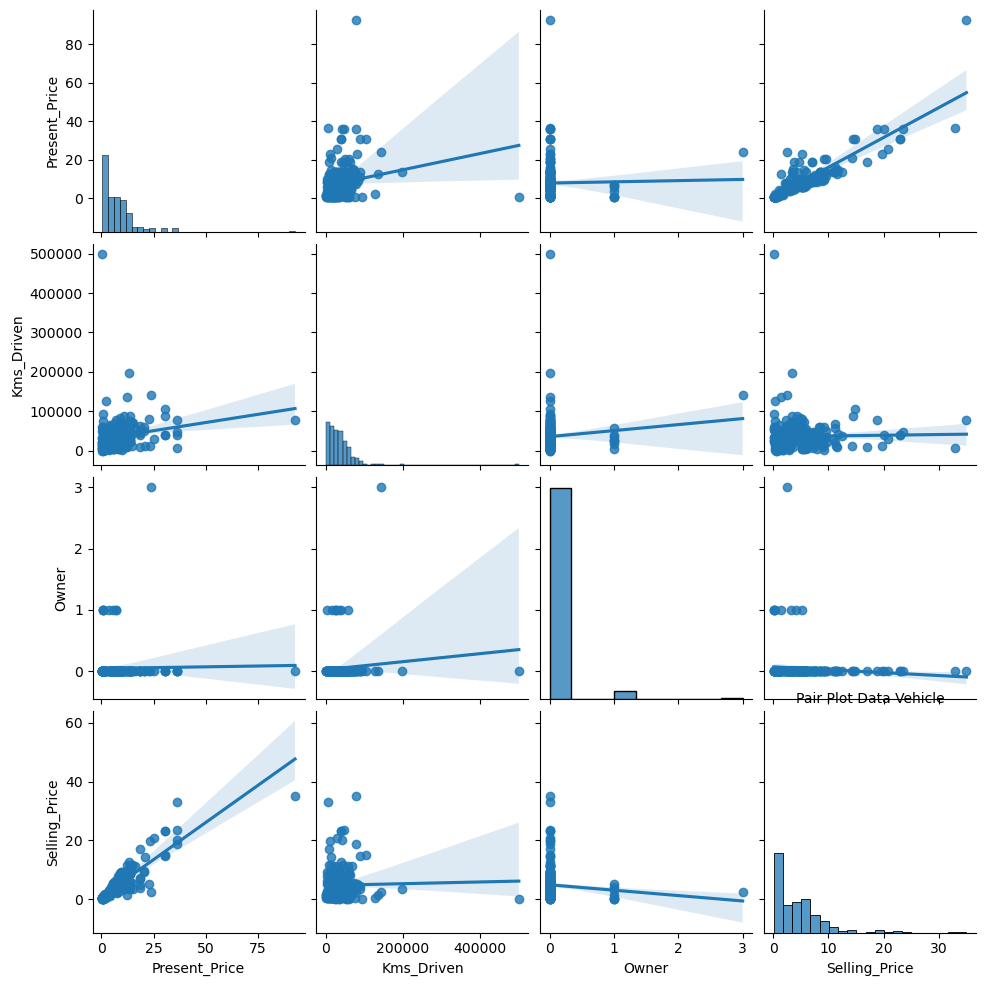

In [34]:
#Membentuk visualisasi dengan pair plot
plt.figure()
sns.pairplot(train_set, kind='reg')
plt.title('Pair Plot Data Vehicle', fontsize=10)
plt.show()

## Kesimpulan


1. data tidak mengandung missing value

2. Imputasi Modus : Year dan Imputasi Median = Kms_Driven, Present_Price dan Owner

3. Outlier tidak dilakukan handling apapun karena merupakan data yang bisa saja terjadi didunia nyata

4. proporsi data pada kolom Fuel_Type terbanyak disandang oleh mobil yang berbahan bakar Petrol sebanyak 177 dengan persentase 78.67% dan yang terendah ialah CNG sebanyak 1 dengan persentase 0.44%

5. proporsi data pada kolom Seller_Type terbanyak disandang oleh tipe penjual Dealer sebanyak 145 dengan persentase 64.44% dan yang terendah ialah Individual sebanyak 80 dengan persentase 35.56%

6. proporsi data pada kolom Transmission terbanyak disandang oleh tipe transmisi Manual sebanyak 193 dengan persentase 85.78% dan yang terendah ialah Automatic sebanyak 32 dengan persentase 14.22%

7. proporsi data pada kolom owner terbanyak disandang oleh tipe owner 0 sebanyak 216 dengan persentase 96.00% dan yang terendah ialah 3 sebanyak 1 dengan persentase 0.44%

8. Secara korelasi, korelasi negatif terendah terdapat pada variabel Year dan Kms_Driven sebesar -0.53 dan Present_Price dan Selling_Price memiliki korelasi positif yang tinggi sebesar 0.89

9. Setelah dicek menggunakan pengujian anova variabel Fuel_Type, Seller_Type, Transmission yang masing masing value dari kolomnya terdapat perbedaan signifikan dalam rata-rata harga jual atau selling_price, yang berarti masing masing variabel dapat memberikan dampak signifikan terhadap harga jual atau selling_price. Namun variabel Owner tidak memiliki perbedaan signifikan dalam Selling_Price yang berarti variabel Owner tidak memberikan dampak signifikan terhadap harga jual atau selling_price

10. Tren Temporal Selling Price dari masing-masing variabel cenderung mengalami pola fluktuatif